# GCP Package structure

## Upload to GCP

In [7]:
# set up bucket client
# stop annoying warnings
import warnings
warnings.filterwarnings("ignore", message="Your application has authenticated using end user credentials")

from google.cloud import storage
from pathlib import Path

# Create client and bucket
bucket_name = "nmfs_odp_nwfsc"
client = storage.Client(project="noaa-gcs-public-data")
bucket = client.bucket(bucket_name)

## metadata

In [5]:
# Local metadata folder
data_dir = Path("../metadata")
destination_prefix = "CB/nwm_daily_means/wr18/metadata"

# Upload each file, skipping unwanted directories and hidden files
for file_path in data_dir.glob("*"):
    if file_path.is_file() and ".ipynb_checkpoints" not in str(file_path):
        blob_path = f"{destination_prefix}/{file_path.name}"
        blob = bucket.blob(blob_path)
        blob.upload_from_filename(str(file_path))
        print(f"✅ Uploaded {file_path.name} to gs://{bucket_name}/{blob_path}")


✅ Uploaded wr18_hydro_metadata.json to gs://nmfs_odp_nwfsc/CB/nwm_daily_means/wr18/metadata/wr18_hydro_metadata.json
✅ Uploaded README.md to gs://nmfs_odp_nwfsc/CB/nwm_daily_means/wr18/metadata/README.md
✅ Uploaded wr18_map.png to gs://nmfs_odp_nwfsc/CB/nwm_daily_means/wr18/metadata/wr18_map.png


## flowline data

In [9]:
# Local flowline folder
data_dir = Path("../flowline")
destination_prefix = "CB/nwm_daily_means/wr18/flowline"

# Upload each file, skipping unwanted directories and hidden files
for file_path in data_dir.glob("*"):
    if file_path.is_file() and ".ipynb_checkpoints" not in str(file_path):
        blob_path = f"{destination_prefix}/{file_path.name}"
        blob = bucket.blob(blob_path)
        blob.upload_from_filename(str(file_path))
        print(f"✅ Uploaded {file_path.name} to gs://{bucket_name}/{blob_path}")


✅ Uploaded WR_18_Flowline.parquet to gs://nmfs_odp_nwfsc/CB/nwm_daily_means/wr18/flowline/WR_18_Flowline.parquet
✅ Uploaded WR_18_metadata.parquet to gs://nmfs_odp_nwfsc/CB/nwm_daily_means/wr18/flowline/WR_18_metadata.parquet
✅ Uploaded README.md to gs://nmfs_odp_nwfsc/CB/nwm_daily_means/wr18/flowline/README.md


## notebooks

In [ ]:
data_dir = Path("../notebooks")
destination_prefix = "CB/nwm_daily_means/wr18/notebooks"

# Upload each file, skipping unwanted directories and hidden files
for file_path in data_dir.glob("*"):
    if file_path.is_file() and ".ipynb_checkpoints" not in str(file_path):
        blob_path = f"{destination_prefix}/{file_path.name}"
        blob = bucket.blob(blob_path)
        blob.upload_from_filename(str(file_path))
        print(f"✅ Uploaded {file_path.name} to gs://{bucket_name}/{blob_path}")


## Use files from GCP

<Axes: >

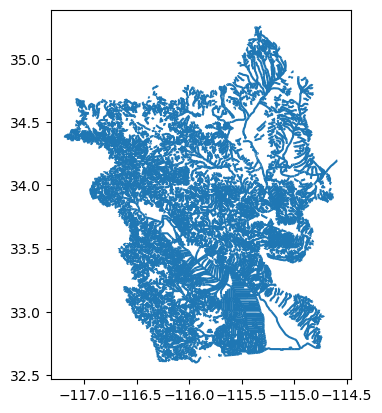

In [11]:
import urllib.request
import geopandas as gpd
url = "https://storage.googleapis.com/nmfs_odp_nwfsc/CB/nwm_daily_means/wr18/flowline/WR_18_Flowline.parquet"
local_path = "WR_18_Flowline.parquet"
urllib.request.urlretrieve(url, local_path)
gdf = gpd.read_parquet("WR_18_Flowline.parquet")
gdf = gdf[gdf["HUC4"] == "1810"]  # optional filter
gdf.plot()